In [9]:
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import os
from PIL import Image
import torchvision.transforms as T

In [1]:
import dataSeismic as ds

c:\ProgramData\Anaconda3\envs\dl2022\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import dir_local as dl
dl.TEST_NOT_NULLCSV

dl.TEST_IMAGE_DIR

'D:/_PHD/Dataset/tgsSalt/test\\images'

In [15]:
class SeismicImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, label_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = label_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        filename = self.img_labels.iloc[idx, 0] + '.png'
        img_path = os.path.join(self.img_dir, filename)
        image = Image.open(img_path)
        label = 1            #self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, label
    

# Custom Dataset Partition
batch_size = 128


full_dataset = SeismicImageDataset(dl.TEST_NOT_NULLCSV,dl.TEST_IMAGE_DIR,transform=transform)
train_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)
dataset_size = len(full_dataset)

In [4]:
dataset_size

17570

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import utils

In [4]:
ds1 = ds.train_dataset
train_loader = ds.train_loader

In [ ]:
tensorImg = ds1[8][0]
numpyImg = tensorImg.numpy()[0]
#Pooling = skimage.measure.block_reduce(numpyImg, (2,2), np.max) 
plt.figure()
plt.subplot(1, 2, 1); plt.imshow(numpyImg,  cmap='gray');  plt.axis('off')
#plt.subplot(1, 2, 2); plt.imshow(mPooling,cmap = 'gray' ); plt.axis('off')
plt.show()

In [14]:
batch_size = 128
transform = T.Compose([T.Resize((32 , 32)),
                       T.Grayscale(num_output_channels=1),
                       #T.RandomHorizontalFlip(),
                       T.ToTensor()
                       #,T.Normalize(data_mean, data_std, inplace=False) 
                     ])

torch.Size([128, 1, 32, 32])


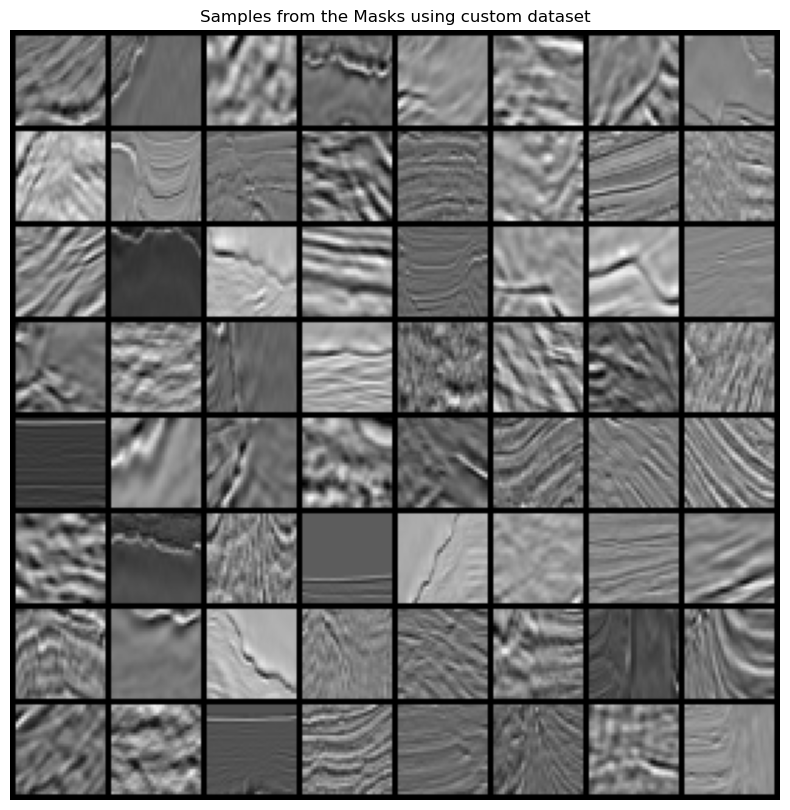

In [7]:
it=iter(train_loader)
real_batch = next(iter(it))
plt.figure(figsize=(10,10))
print(real_batch[0].size())
plt.imshow(np.transpose(utils.make_grid(real_batch[0][:64], padding=2, normalize=True).cpu(),(1,2,0)),cmap='gray')
plt.axis('off')
plt.title('Samples from the Masks using custom dataset');
plt.show()

In [ ]:
it=iter(dataloaderCustomDS)
real_batch = next(iter(it))
plt.figure(figsize=(10,10))
print(real_batch[0].size())
plt.imshow(np.transpose(utils.make_grid(real_batch[0][:64], padding=2, normalize=True).cpu(),(1,2,0)),cmap='gray')
plt.axis('off')
plt.title('Samples from the Masks using custom dataset');
plt.show()

In [10]:
df = pd.DataFrame(np.random.randn(100, 2))
msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]

In [12]:
train.size

156

In [13]:
test.size

44

In [15]:
df.size

200

In [16]:
msk

array([ True,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True])

In [ ]:
dfNotNull.to_csv(r'train_testimage.csv',index=False)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)